In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [147]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [148]:
# Load data
data = pd.read_csv('/content/drive/MyDrive/online+shoppers+purchasing+intention+dataset/online_shoppers_intention.csv')

In [149]:
# Display the first 5 rows of the dataset
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [150]:
# Check data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [151]:
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [152]:
# Check for missing values
data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

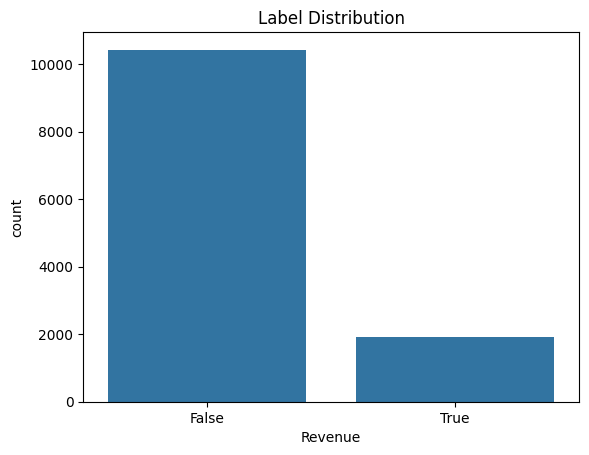

In [153]:
# Visualisasikan proporsi label
sns.countplot(x='Revenue', data=data)
plt.title('Label Distribution')
plt.show()

In [168]:
# One hot encoding
data1 = pd.get_dummies(data)

In [169]:
# Label encoding of revenue
le = LabelEncoder()
data['Revenue'] = le.fit_transform(data['Revenue'])

In [170]:
# Dependent and independent variables
x = data1
y = data['Revenue']

In [171]:
# Splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [173]:
# Scaling the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [174]:
# PCA
pca = PCA(n_components=None)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [175]:
# Applying SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_train_res, y_train_res = smote.fit_resample(x_train, y_train)
print(pd.Series(y_train_res).value_counts())

Revenue
0    7345
1    7345
Name: count, dtype: int64


In [176]:
# Initialize results dictionary
results = {}

In [181]:
# Logistic Regression
model_lr = LogisticRegression(penalty='l1', C=0.01, solver='liblinear')
model_lr.fit(x_train_res, y_train_res)
y_pred_lr = model_lr.predict(x_test)

print("Logistic Regression Training Accuracy:", model_lr.score(x_train_res, y_train_res))
print("Logistic Regression Testing Accuracy:", model_lr.score(x_test, y_test))
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

# Cross-validation with F1-score for Logistic Regression
cv_scores_lr = cross_val_score(model_lr, x, y, cv=10, scoring='f1')
print(f"Logistic Regression Cross-Validated F1-Score: {cv_scores_lr.mean()} (+/- {cv_scores_lr.std()})\n")
results['Logistic Regression'] = cv_scores_lr.mean()

Logistic Regression Training Accuracy: 1.0
Logistic Regression Testing Accuracy: 1.0
[[3077    0]
 [   0  622]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3077
           1       1.00      1.00      1.00       622

    accuracy                           1.00      3699
   macro avg       1.00      1.00      1.00      3699
weighted avg       1.00      1.00      1.00      3699

Logistic Regression Cross-Validated F1-Score: 0.9965837533028491 (+/- 0.003123767749616752)



In [182]:
# Random Forest
model_rf = RandomForestClassifier()
model_rf.fit(x_train_res, y_train_res)
y_pred_rf = model_rf.predict(x_test)

print("Random Forest Training Accuracy:", model_rf.score(x_train_res, y_train_res))
print("Random Forest Testing Accuracy:", model_rf.score(x_test, y_test))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Cross-validation with F1-score for Random Forest
cv_scores_rf = cross_val_score(model_rf, x, y, cv=10, scoring='f1')
print(f"Random Forest Cross-Validated F1-Score: {cv_scores_rf.mean()} (+/- {cv_scores_rf.std()})\n")
results['Random Forest'] = cv_scores_rf.mean()

Random Forest Training Accuracy: 1.0
Random Forest Testing Accuracy: 0.9986482833198161
[[3072    5]
 [   0  622]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3077
           1       0.99      1.00      1.00       622

    accuracy                           1.00      3699
   macro avg       1.00      1.00      1.00      3699
weighted avg       1.00      1.00      1.00      3699

Random Forest Cross-Validated F1-Score: 1.0 (+/- 0.0)



In [183]:
# Decision Tree
model_dt = DecisionTreeClassifier()
model_dt.fit(x_train_res, y_train_res)
y_pred_dt = model_dt.predict(x_test)

print("Decision Tree Training Accuracy:", model_dt.score(x_train_res, y_train_res))
print("Decision Tree Testing Accuracy:", model_dt.score(x_test, y_test))
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

# Cross-validation with F1-score for Decision Tree
cv_scores_dt = cross_val_score(model_dt, x, y, cv=10, scoring='f1')
print(f"Decision Tree Cross-Validated F1-Score: {cv_scores_dt.mean()} (+/- {cv_scores_dt.std()})\n")
results['Decision Tree'] = cv_scores_dt.mean()

Decision Tree Training Accuracy: 1.0
Decision Tree Testing Accuracy: 0.9970262233035956
[[3069    8]
 [   3  619]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3077
           1       0.99      1.00      0.99       622

    accuracy                           1.00      3699
   macro avg       0.99      1.00      0.99      3699
weighted avg       1.00      1.00      1.00      3699

Decision Tree Cross-Validated F1-Score: 1.0 (+/- 0.0)



In [185]:
# Hyperparameter tuning for Logistic Regression
params_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l2']
}
grid_search_lr = GridSearchCV(estimator=LogisticRegression(max_iter=5000), param_grid=params_lr, cv=5, scoring='f1')
grid_search_lr.fit(x_train_res, y_train_res)
print("Logistic Regression Best Score:", grid_search_lr.best_score_)
print("Logistic Regression Best Params:", grid_search_lr.best_params_)

# Hyperparameter tuning for Random Forest
params_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}
grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(), param_grid=params_rf, cv=5, scoring='f1')
grid_search_rf.fit(x_train_res, y_train_res)
print("Random Forest Best Score:", grid_search_rf.best_score_)
print("Random Forest Best Params:", grid_search_rf.best_params_)

# Hyperparameter tuning for Decision Tree
params_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}
grid_search_dt = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=params_dt, cv=5, scoring='f1')
grid_search_dt.fit(x_train_res, y_train_res)
print("Decision Tree Best Score:", grid_search_dt.best_score_)
print("Decision Tree Best Params:", grid_search_dt.best_params_)

Logistic Regression Best Score: 1.0
Logistic Regression Best Params: {'C': 0.1, 'penalty': 'l2'}
Random Forest Best Score: 0.9991158543398806
Random Forest Best Params: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Decision Tree Best Score: 0.9975518522465509
Decision Tree Best Params: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


The best model is: Random Forest with a Cross-Validated F1-Score of 1.0


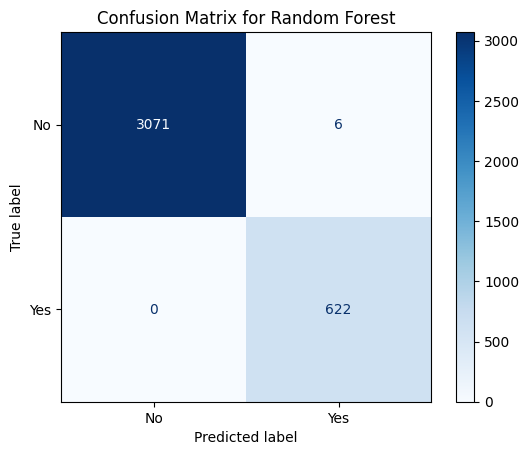

In [186]:
# Find the best model
best_model_name = max(results, key=results.get)
print(f"The best model is: {best_model_name} with a Cross-Validated F1-Score of {results[best_model_name]}")

# Visualizing Confusion Matrix for the best model
if best_model_name == 'Logistic Regression':
    best_model = grid_search_lr.best_estimator_
elif best_model_name == 'Random Forest':
    best_model = grid_search_rf.best_estimator_
elif best_model_name == 'Decision Tree':
    best_model = grid_search_dt.best_estimator_

best_model.fit(x_train_res, y_train_res)
y_pred_best = best_model.predict(x_test)

cm_best = confusion_matrix(y_test, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_best, display_labels=['No', 'Yes'])
disp.plot(cmap=plt.cm.Blues)
plt.title(f'Confusion Matrix for {best_model_name}')
plt.show()